## Problem Statement
### Objective
A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.

You are the best data scientist in Greenland and they've hired you to solve this problem. Now you are responsible for developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).

### Dataset & Data Description
The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

*  Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment
*  Survived_1_year == 1, implies that the patient survived after 1 year of treatment

To load the dataset in your jupyter notebook, use the below command:


```
import pandas as pd
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_advc.csv')
```


#### Data Description:

*  ID_Patient_Care_Situation: Care situation of a patient during treatment
*  Diagnosed_Condition: The diagnosed condition of the patient
*  ID_Patient: Patient identifier number
*  Treatment_with_drugs: Class of drugs used during treatment
*  Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)
*  Patient_Age: Age of the patient
*  Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.
*  Patient_Smoker: If the patient was a smoker or not
*  Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country
*  Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

### **Load Libraries**

In [1]:
import pandas as pd   # package for data analysis
import numpy as np    # package for numerical computations

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set

from sklearn.linear_model import LogisticRegression     # Logistic regression model

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    # for converting categorical to numerical

from sklearn.metrics import f1_score    # for model evaluation

### **Load Data**

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_advc.csv')

In [3]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,Dx6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,dx6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,dx1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


### Data Preparation

In [4]:
data.Treated_with_drugs.value_counts()

DX6                     4812
DX6                     2383
DX5                     1153
DX2                     1094
DX4                     1045
                        ... 
Dx1 dx2 dx3 dx4            1
Dx2 dx3 dx4 dx5            1
dx1 dx2 dx4 dx5            1
Dx1 dx3 dx4 dx5            1
DX1 DX2 DX3 DX4 DX5        1
Name: Treated_with_drugs, Length: 182, dtype: int64

Let's convert all the values in the column - 'Treated_with_drugs' to upper case

In [5]:
data['Treated_with_drugs'] = data['Treated_with_drugs'].str.upper()

In [6]:
data.Patient_Smoker.value_counts()

NO             10511
YES             7833
NO              3891
YES             2710
YESS             100
YESS              26
Cannot say         4
Cannot say         2
CANNOT SAY         1
CANNOT SAY         1
Name: Patient_Smoker, dtype: int64

There should be three category here - NO, YES, and Cannot say

In [7]:
def smoker(r):
  if (r == "NO") or (r == "NO "):
    return 'NO'
  elif (r == "YES") or (r == "YES ") or (r == "YESS") or (r == "YESS "):
    return 'YES'
  else:
    return 'Cannot say'

data.Patient_Smoker = data.Patient_Smoker.apply(smoker)  # Applying the function to all the entries of Patient_Smoker column

In [8]:
data.Patient_Rural_Urban.value_counts()

RURAL    17482
URBAN     7597
Name: Patient_Rural_Urban, dtype: int64

In [9]:
data.Patient_mental_condition.value_counts()

Stable    25079
Name: Patient_mental_condition, dtype: int64

### **EDA** 

In [10]:
# A summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  25079 non-null  int64  
 1   Diagnosed_Condition        25079 non-null  int64  
 2   Patient_ID                 25079 non-null  int64  
 3   Treated_with_drugs         25071 non-null  object 
 4   Patient_Age                25079 non-null  int64  
 5   Patient_Body_Mass_Index    25079 non-null  float64
 6   Patient_Smoker             25079 non-null  object 
 7   Patient_Rural_Urban        25079 non-null  object 
 8   Patient_mental_condition   25079 non-null  object 
 9   A                          23723 non-null  float64
 10  B                          23723 non-null  float64
 11  C                          23723 non-null  float64
 12  D                          23723 non-null  float64
 13  E                          23723 non-null  flo

**Observations:**

1. There are 23097 observations divided into 17 columns.
2. There are some missing values in the dataset.


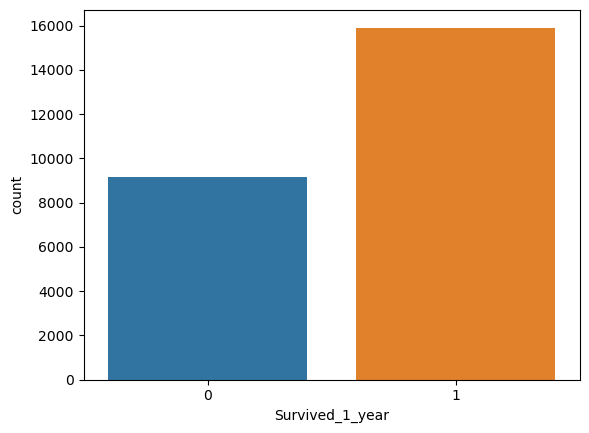

In [11]:
sns.countplot(x='Survived_1_year', data=data)
plt.show()

In [12]:
# getting only the numerical features
numeric_features = data.select_dtypes(include=[np.number])    # select_dtypes helps you to select data of particular types 
numeric_features.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Survived_1_year'],
      dtype='object')

In [13]:
numeric_data=data[['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond', 'Survived_1_year']]  #keeping in the target varibale for analysis purposes
numeric_data.head()

# ID_Patient_Care_Situation and Patient_ID are just an ID we can ignore them for data analysis.
# Number_of_prev_cond is dependent on 7 columns - A, B, C, D, E, F, Z

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
0,47,60,21.655523,2.0,1
1,3,2,28.852743,3.0,0
2,7,20,26.179725,2.0,1
3,31,8,22.638945,2.0,0
4,43,53,21.326131,1.0,1


In [14]:
# Checking the null values in numerical columns
numeric_data.isnull().sum()

Diagnosed_Condition           0
Patient_Age                   0
Patient_Body_Mass_Index       0
Number_of_prev_cond        1356
Survived_1_year               0
dtype: int64

In [15]:
data['Number_of_prev_cond'] = data['Number_of_prev_cond'].fillna(data['Number_of_prev_cond'].mode()[0])  # filling the missing value of 'Number_of_prev_cond'

numeric_data['Number_of_prev_cond']=data['Number_of_prev_cond']
numeric_data.isnull().sum()

# The returned object by using mode() is a series so we are filling the null value with the value at 0th index ( which gives us the mode of the data)

Diagnosed_Condition        0
Patient_Age                0
Patient_Body_Mass_Index    0
Number_of_prev_cond        0
Survived_1_year            0
dtype: int64

In [16]:
numeric_data.describe()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
count,25079.000000,25079.000000,25079.000000,25079.000000,25079.000000
mean,26.382631,33.193548,23.439952,1.707803,0.634316
std,15.096967,19.507617,3.778849,0.768082,0.481631
min,0.000000,0.000000,1.089300,1.000000,0.000000
25%,13.000000,16.000000,20.205050,1.000000,0.000000
50%,26.000000,33.000000,23.369168,2.000000,1.000000
75%,40.000000,50.000000,26.730785,2.000000,1.000000
max,52.000000,142.000000,29.999579,5.000000,1.000000


**Observations**

1. The minimum and maximum values for all the numerical columns.
2. The mean and median (i.e. 50%) value for all the numerical columns are nearly same.


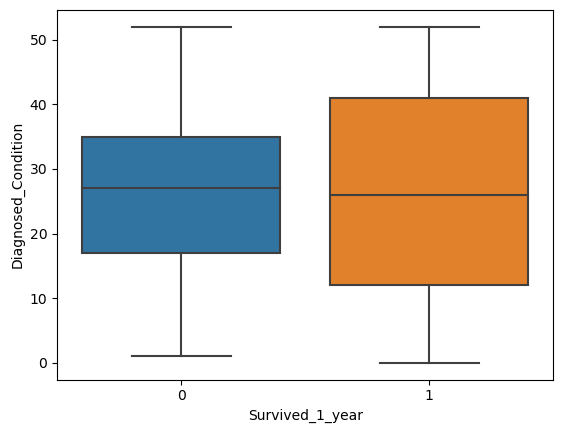

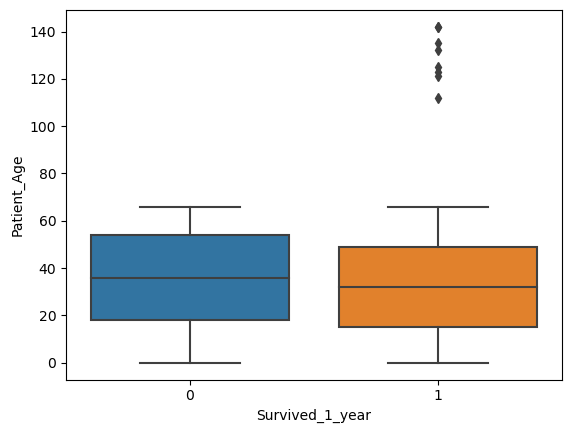

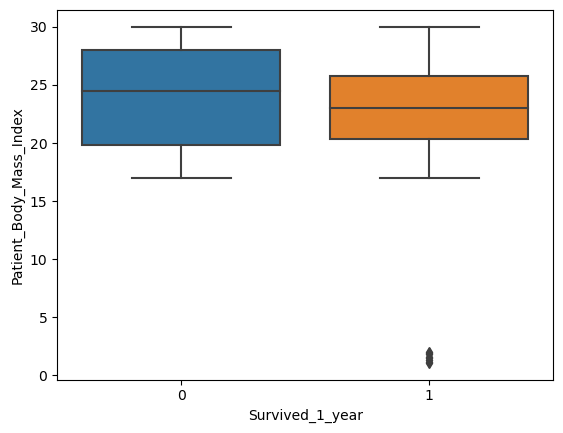

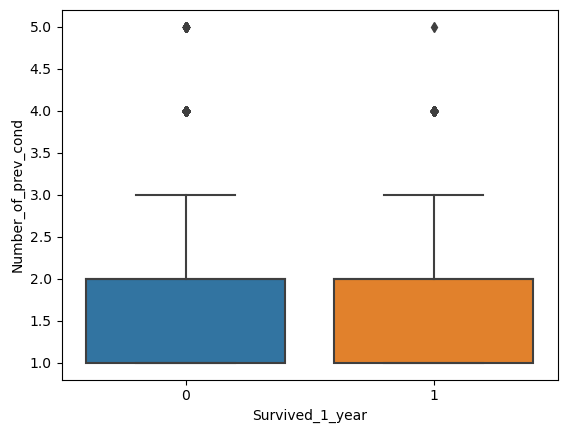

In [17]:

for feature in numeric_data.drop('Survived_1_year', axis = 1).columns:
  sns.boxplot(x='Survived_1_year', y=feature, data=numeric_data)
  plt.show()

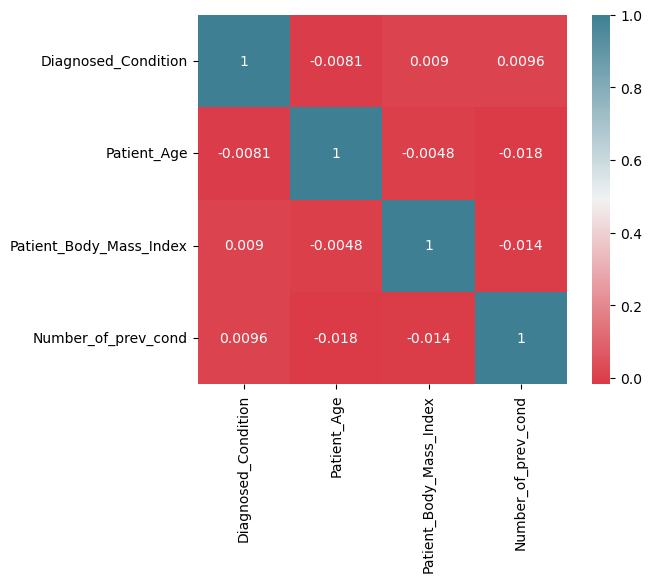

In [18]:
numeric_data=numeric_data.drop(['Survived_1_year'], axis=1)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(numeric_data.corr(),
            cmap = colormap,
            square = True,
            annot = True)
plt.show()

In [19]:
data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              8
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1356
B                            1356
C                            1356
D                            1356
E                            1356
F                            1356
Z                            1356
Number_of_prev_cond             0
Survived_1_year                 0
dtype: int64

#### *Filling Missing values*

In [20]:
data['Treated_with_drugs']=data['Treated_with_drugs'].fillna(data['Treated_with_drugs'].mode()[0])

In [21]:
data['A'].fillna(data['A'].mode()[0], inplace = True)
data['B'].fillna(data['B'].mode()[0], inplace = True)
data['C'].fillna(data['C'].mode()[0], inplace = True)
data['D'].fillna(data['D'].mode()[0], inplace = True)
data['E'].fillna(data['E'].mode()[0], inplace = True)
data['F'].fillna(data['F'].mode()[0], inplace = True)
data['Z'].fillna(data['Z'].mode()[0], inplace = True)

In [22]:
data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

### EDA on Categorical Data

In the categorical_data variable we'll keep all the categorical features and remove the others.

In [23]:
categorical_data = data.drop(numeric_data.columns, axis=1)    # dropping the numerical columns from the dataframe 'data'
categorical_data.drop(['Patient_ID', 'ID_Patient_Care_Situation'], axis=1, inplace = True)    # dropping the id columns form the dataframe 'categorical data'
categorical_data.head()    # Now we are left with categorical columns only. take a look at first five observaitons

,Treated_with_drugs,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Survived_1_year
0,DX2,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,DX6,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,DX6,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,DX6,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,DX1,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [24]:
categorical_data.nunique()   # nunique() return you the number of unique values in each column/feature

Treated_with_drugs          64
Patient_Smoker               3
Patient_Rural_Urban          2
Patient_mental_condition     1
A                            2
B                            2
C                            2
D                            2
E                            2
F                            2
Z                            2
Survived_1_year              2
dtype: int64

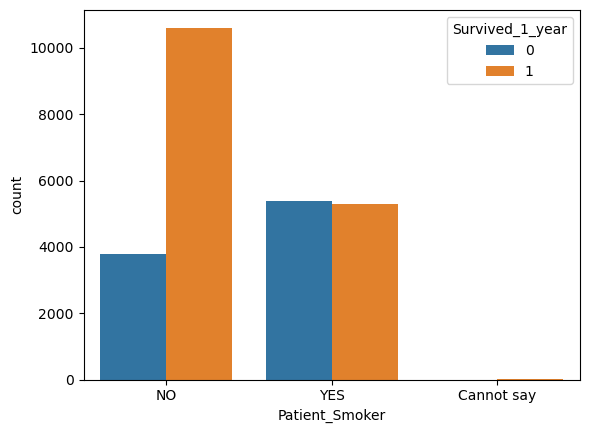

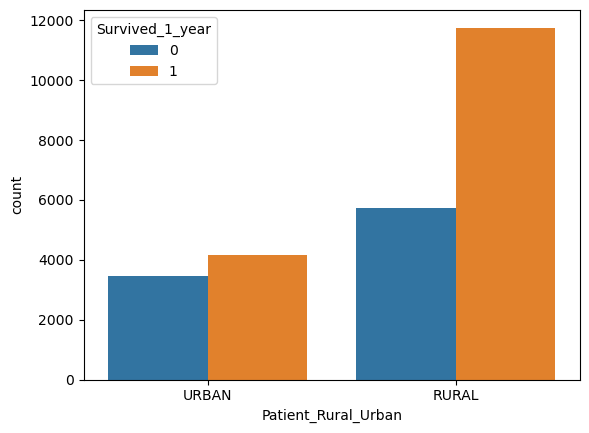

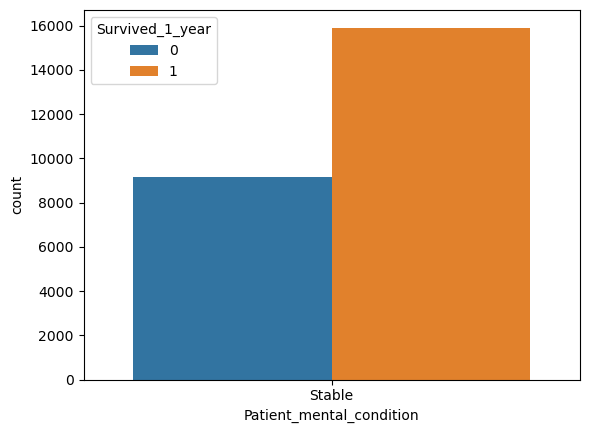

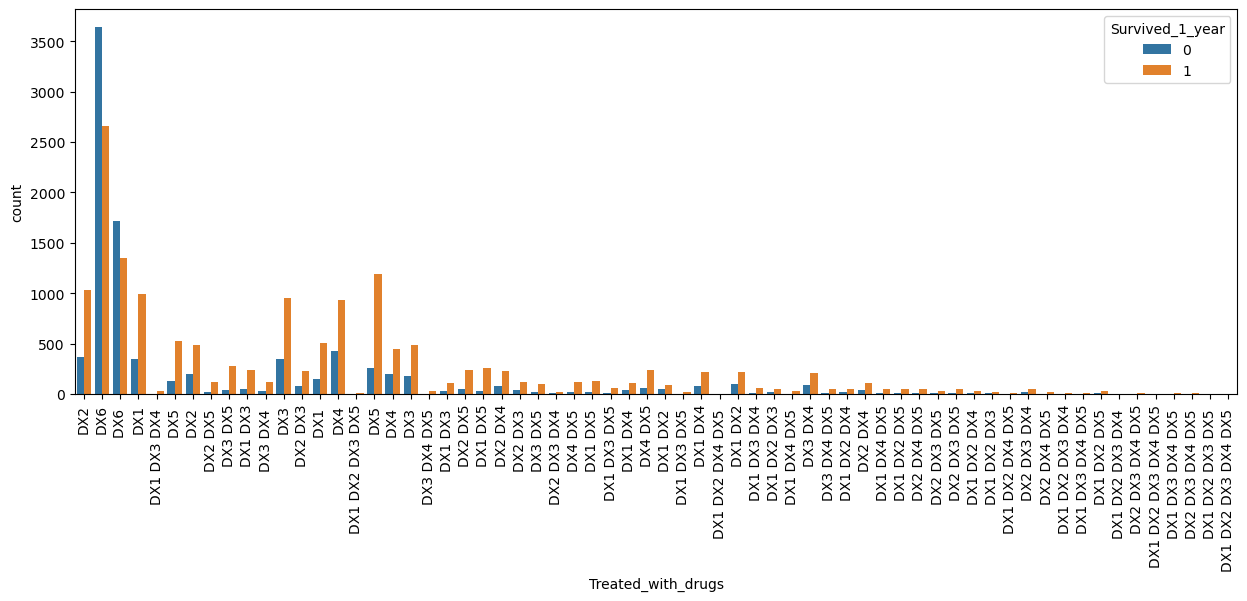

In [25]:
# Visualization of categorical columns
for feature in ['Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition']:
  sns.countplot(x=feature,  hue='Survived_1_year', data=categorical_data)
  plt.show()


plt.figure(figsize=(15,5))
sns.countplot(x='Treated_with_drugs',  hue='Survived_1_year', data=categorical_data)
plt.xticks(rotation=90)
plt.show()


#### **Pre-Processing and Data Cleaning of Categorical Variables**


In [26]:
drugs = data['Treated_with_drugs'].str.get_dummies(sep=' ') # split all the entries separated by space and create dummy variable
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,1,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,1,0,0,0,0,0


In [27]:
data = pd.concat([data, drugs], axis=1)     # concat the two dataframes 'drugs' and 'data'
data = data.drop('Treated_with_drugs', axis=1)    # dropping the column 'Treated_with_drugs' as its values are now splitted into different columns

data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,16201,47,8433,60,21.655523,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,2.0,1,0,1,0,0,0,0
1,9421,3,2972,2,28.852743,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,3.0,0,0,0,0,0,0,1
2,16205,7,8608,20,26.179725,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,2.0,1,0,0,0,0,0,1
3,5582,31,10074,8,22.638945,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,2.0,0,0,0,0,0,0,1
4,20880,43,7462,53,21.326131,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,1,0,0,0,0,0


In [28]:
data.Patient_Smoker.value_counts()

NO            14402
YES           10669
Cannot say        8
Name: Patient_Smoker, dtype: int64

In [29]:
data.Patient_Smoker[data['Patient_Smoker'] == "Cannot say"] = 'NO'    # we already know 'NO' is the mode so directly changing the values 'Cannot say' to 'NO'

In [30]:
data.drop('Patient_mental_condition', axis = 1, inplace=True)

In [31]:
data = pd.get_dummies(data, columns=['Patient_Smoker', 'Patient_Rural_Urban'])

In [32]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,16201,47,8433,60,21.655523,1.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,1,0,0,1
1,9421,3,2972,2,28.852743,1.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,1,1,0,1,0
2,16205,7,8608,20,26.179725,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,1,0,1,0
3,5582,31,10074,8,22.638945,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,1,0,1,0
4,20880,43,7462,53,21.326131,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,1,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  25079 non-null  int64  
 1   Diagnosed_Condition        25079 non-null  int64  
 2   Patient_ID                 25079 non-null  int64  
 3   Patient_Age                25079 non-null  int64  
 4   Patient_Body_Mass_Index    25079 non-null  float64
 5   A                          25079 non-null  float64
 6   B                          25079 non-null  float64
 7   C                          25079 non-null  float64
 8   D                          25079 non-null  float64
 9   E                          25079 non-null  float64
 10  F                          25079 non-null  float64
 11  Z                          25079 non-null  float64
 12  Number_of_prev_cond        25079 non-null  float64
 13  Survived_1_year            25079 non-null  int

In [34]:
print(data.ID_Patient_Care_Situation.nunique())     # nunique() gives you the count of unique values in the column
print(data.Patient_ID.nunique())

23097
10599


In [35]:
data.drop(['ID_Patient_Care_Situation'], axis =1, inplace=True)

### **Prepare Train/Test Data**

1. Separating the input and output variables

In [36]:
X = data.drop('Survived_1_year',axis = 1)
y = data['Survived_1_year']

2. Train/test split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### **Model Building**

We have seen from Exploratory Data Analysis that this is a classification problem as the target column 'Survived_1_year' has two values 0 - means the patient did not survive after one year of treatment, 1 - means the patient survived after one year of treatment. So we can use classification models for this problem. Some of the classification models are - Logistic Regression, Random Forest Classifier, Decision Tree Classifier, etc. However, we have used two of them - Logistic Regression and Random Forest Classifier.

### 1. Logistic Regression Model

In [38]:
model = LogisticRegression(max_iter = 1000)     # The maximum number of iterations will be 1000. This will help you prevent from convergence warning.
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [39]:
pred = model.predict(X_test)

*Evaluation:*

In [40]:
print(f1_score(y_test,pred))

0.7900146842878121


### 2. Random Forest

In [41]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [42]:
forest = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

##### Evaluating on X_test

In [43]:
y_pred = forest.predict(X_test)

fscore = f1_score(y_test ,y_pred)
fscore

0.8407117437722419

### 3. Random Forest and Boruta

In [44]:
pip install boruta

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [45]:
from boruta import BorutaPy

In [46]:
boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(X_train), np.array(y_train))       # fitting the boruta selector to get all relavent features. NOTE: BorutaPy accepts numpy arrays only.

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
I

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=123,
                                          random_state=RandomState(MT19937) at 0x227ED560940),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x227ED560940, verbose=2)

In [47]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True  True False  True False False False  True
  True  True  True  True  True  True  True  True  True  True]
Ranking:  [1 1 1 1 1 1 2 1 3 4 5 1 1 1 1 1 1 1 1 1 1 1]
No. of significant features:  18


#### Displaying features rank wise

In [48]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,Diagnosed_Condition,1
19,Patient_Smoker_YES,1
18,Patient_Smoker_NO,1
17,DX6,1
16,DX5,1
15,DX4,1
14,DX3,1
13,DX2,1
12,DX1,1
11,Number_of_prev_cond,1


#### Create a new subset of the data with only the selected features

In [49]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

#### Build the model with selected features

In [50]:
# Create a new random forest classifier for the most important features
rf_important = RandomForestClassifier(random_state=1, n_estimators=1000, n_jobs = -1)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=1)

#### Evaluation

In [51]:
y_important_pred = rf_important.predict(X_important_test)
rf_imp_fscore = f1_score(y_test, y_important_pred)

In [52]:
print(rf_imp_fscore)

0.8845614581710547


### Hyper Parameter Tunning

In [53]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000]}

In [54]:
rf = RandomForestClassifier(random_state = 1)

# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [55]:
grid_search.fit(X_important_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'n_estimators': [500, 1000]},
             verbose=2)

In [56]:
grid_search.best_params_

{'bootstrap': False, 'max_depth': 15, 'n_estimators': 500}

In [57]:
pred = grid_search.predict(X_important_test)

In [58]:
f1_score(y_test, pred)

0.8880666049953747

# Conclusion
* It is clearly observable that how the f1 scores increased from logistic regression to random forest, random forest with full features to random forest on the selected features using Boruta. 
* Then again the f1 score increased with Hyper parameter tunning.


## New Test Data
Tasks to be performed:
*  Load the new test data
*  Data Preparation - same as done on training data
*  If missing values are there then fill the missing values with the same techniques that were used for training dataset
*  Convert categorical column to numerical
*  Predict the output
*  Download the predicted values in csv

In [59]:
import pandas as pd

In [60]:
# Load the data
test_new_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_advc.csv")

In [61]:
test_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9330 non-null   int64  
 1   Diagnosed_Condition        9330 non-null   int64  
 2   Patient_ID                 9330 non-null   int64  
 3   Treated_with_drugs         9330 non-null   object 
 4   Patient_Age                9330 non-null   int64  
 5   Patient_Body_Mass_Index    9330 non-null   float64
 6   Patient_Smoker             9330 non-null   object 
 7   Patient_Rural_Urban        9330 non-null   object 
 8   Patient_mental_condition   9330 non-null   object 
 9   A                          9330 non-null   float64
 10  B                          9330 non-null   float64
 11  C                          9330 non-null   float64
 12  D                          9330 non-null   float64
 13  E                          9330 non-null   float

In [62]:
# take a look how the new test data look like
test_new_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,24206,35,4640,DX5,65,20.710365,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,32827,30,3214,dx1,2,24.250219,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2,3694,46,3564,dx6,1,27.139276,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7164,44,5176,DX1,29,29.191759,NO,RURAL,Stable,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
4,1259,30,1101,DX5,51,20.844146,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Data Preparation - same as we did for training data

In [63]:
test_new_data.Treated_with_drugs.value_counts()

DX6                 1856
DX6                  789
DX1                  416
DX5                  407
DX2                  405
                    ... 
dx1 dx3 dx4            1
dx2 dx3 dx4            1
Dx1 dx2 dx4            1
DX1 DX2 DX4 DX5        1
dx1 dx2 dx3 dx4        1
Name: Treated_with_drugs, Length: 173, dtype: int64

In [64]:
test_new_data['Treated_with_drugs'] = test_new_data['Treated_with_drugs'].str.upper()

In [65]:
test_new_data.Patient_Smoker.value_counts()

NO       3949
YES      2879
NO       1424
YES      1027
YESS       36
YESS       15
Name: Patient_Smoker, dtype: int64

In [66]:
def smoker(r):
  if (r == "NO") or (r == "NO "):
    return 'NO'
  elif (r == "YES") or (r == "YES ") or (r == "YESS") or (r == "YESS "):
    return 'YES'
  else:
    return 'Cannot say'

test_new_data.Patient_Smoker = test_new_data.Patient_Smoker.apply(smoker)

In [67]:
test_new_data.Patient_Rural_Urban.value_counts()

RURAL    6547
URBAN    2783
Name: Patient_Rural_Urban, dtype: int64

In [68]:
test_new_data.Patient_mental_condition.value_counts()

Stable    9330
Name: Patient_mental_condition, dtype: int64

### Checking missing values

In [69]:
test_new_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

#### Preprocessing and data cleaning: same as we did on training data

In [70]:
drugs = test_new_data['Treated_with_drugs'].str.get_dummies(sep=' ') # split all the entries
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,1,0


In [71]:
test_new_data = pd.concat([test_new_data, drugs], axis=1)     # concat the two dataframes 'drugs' and 'data'
test_new_data = test_new_data.drop('Treated_with_drugs', axis=1)    # dropping the column 'Treated_with_drugs' as its values are splitted into different columns

test_new_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
0,24206,35,4640,65,20.710365,NO,RURAL,Stable,1.0,0.0,...,1.0,0.0,0.0,2.0,0,0,0,0,1,0
1,32827,30,3214,2,24.250219,NO,URBAN,Stable,1.0,0.0,...,1.0,0.0,0.0,2.0,1,0,0,0,0,0
2,3694,46,3564,1,27.139276,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0,0,0,1
3,7164,44,5176,29,29.191759,NO,RURAL,Stable,0.0,0.0,...,1.0,0.0,0.0,2.0,1,0,0,0,0,0
4,1259,30,1101,51,20.844146,NO,URBAN,Stable,0.0,0.0,...,1.0,0.0,0.0,1.0,0,0,0,0,1,0


In [72]:
test_new_data.Patient_Smoker.value_counts()

NO     5373
YES    3957
Name: Patient_Smoker, dtype: int64

In [73]:
test_new_data.drop('Patient_mental_condition', axis = 1, inplace=True)

In [74]:
test_new_data = pd.get_dummies(test_new_data, columns=['Patient_Smoker', 'Patient_Rural_Urban'])

In [75]:
test_new_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,24206,35,4640,65,20.710365,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,1,0,1,0
1,32827,30,3214,2,24.250219,1.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,1,0,0,1
2,3694,46,3564,1,27.139276,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
3,7164,44,5176,29,29.191759,0.0,0.0,1.0,0.0,1.0,...,1,0,0,0,0,0,1,0,1,0
4,1259,30,1101,51,20.844146,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,1,0,0,1


In [76]:
test_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9330 non-null   int64  
 1   Diagnosed_Condition        9330 non-null   int64  
 2   Patient_ID                 9330 non-null   int64  
 3   Patient_Age                9330 non-null   int64  
 4   Patient_Body_Mass_Index    9330 non-null   float64
 5   A                          9330 non-null   float64
 6   B                          9330 non-null   float64
 7   C                          9330 non-null   float64
 8   D                          9330 non-null   float64
 9   E                          9330 non-null   float64
 10  F                          9330 non-null   float64
 11  Z                          9330 non-null   float64
 12  Number_of_prev_cond        9330 non-null   float64
 13  DX1                        9330 non-null   int64

In [77]:
test_new_data.drop(['ID_Patient_Care_Situation'], axis =1, inplace=True)

In [78]:
test_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        9330 non-null   int64  
 1   Patient_ID                 9330 non-null   int64  
 2   Patient_Age                9330 non-null   int64  
 3   Patient_Body_Mass_Index    9330 non-null   float64
 4   A                          9330 non-null   float64
 5   B                          9330 non-null   float64
 6   C                          9330 non-null   float64
 7   D                          9330 non-null   float64
 8   E                          9330 non-null   float64
 9   F                          9330 non-null   float64
 10  Z                          9330 non-null   float64
 11  Number_of_prev_cond        9330 non-null   float64
 12  DX1                        9330 non-null   int64  
 13  DX2                        9330 non-null   int64

### Prediction

In [79]:
imp_test_features = boruta_selector.transform(np.array(test_new_data))

In [80]:
prediction = grid_search.predict(imp_test_features)